# Exercise 2: Fraunhofer and Fresnel diffraction

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.integrate import quad
from math import pi

## Core Task 1

Fraunhofer diffraction:
$$\psi(y)\propto \Delta \sum_{j=0}^{N-1} A'(x_j)\exp\left(\frac{-ikx_jy}{D}\right)=\Delta \sum_{j=0}^{N-1} A'(x_j)\exp\left(-i\frac{2\pi x_jy}{\lambda D}\right)$$

The definition of $x_j$:
$$x_j=\left(j-\frac{N}{2}\right)\frac{L}{N}$$

$L$ is the extent of the aperture, and $N$ is the number of samples

The diffracted wave function is a Fourier transform with frequency:
$$f_n=\frac{n}{N(L/N)}=\frac{n}{L}=\frac{y_n}{\lambda D}$$

${y_n}$ is a set of points on the screen where the diffraction pattern is sampled.

In [2]:
# Parameters of the wave and diffraction geometry
Lambda = 500e-9
D = 1

Aperture modelled by Heaviside step function

Ideal:
$$\psi_n^2 \propto \mathrm{sinc}^2\left(\frac{kdy_n}{2D}\right)=\mathrm{sinc}^2(\pi f_nd)$$

The $k$th minima is expected at:
$$y_k=k\frac{\lambda D}{d}$$

For the given values of $\lambda$, $D$, and $d$, $\lambda D/d$ is expected at $5\times 10^{-3}\,\text{m}$

In [3]:
# The aperture
L=5e-3
d=100e-6
N = 512          # FFT sampling rate

x_ap = np.linspace(0, L, N)

def aperture_step(x):
    return np.heaviside(x-(L/2-d/2), 0.5)-np.heaviside(x-(L/2+d/2), 0.5)

In [4]:
Psi = np.fft.fft(aperture_step(x_ap))
f = np.fft.fftfreq(N, L/N)
Psi1 = np.fft.fftshift(Psi)
f1 = np.fft.fftshift(f)

I = np.square(np.abs(Psi1))
y1 = Lambda*D*f1

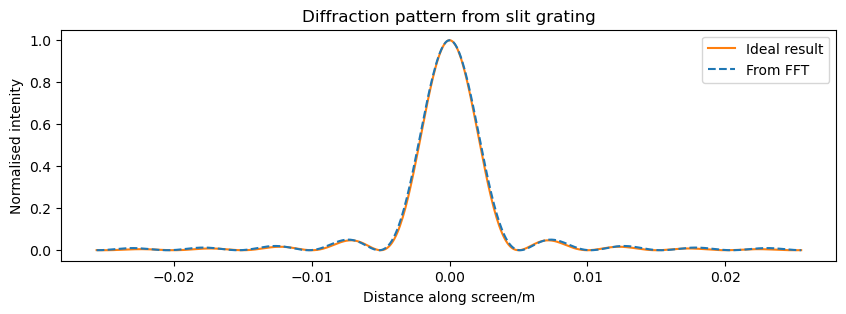

In [5]:
fig, ax = plt.subplots(figsize=(10,3))

ax.plot(y1, np.square(np.sinc(d*y1/(Lambda*D))), color='tab:orange', label='Ideal result')
ax.plot(y1, I/np.max(I), color='tab:blue', label='From FFT', linestyle='dashed')
ax.set_xlabel('Distance along screen/m')
ax.set_ylabel('Normalised intenity')
ax.set_title('Diffraction pattern from slit grating')

ax.legend()
plt.show()

## Conclusion to Core Task 1

FFT is successful in reproducing the diffraction pattern for a slit. There are inaccuracies, likely due to the discrete nature of the transform.

# Core Task 2

In [6]:
# Properties of second aperture
L=5e-3
D=10
d=2e-3
N = 1024
m = 8
s = 100e-6

x_ap = np.linspace(0, L, N)

def aperture_sin(x):
    return aperture_step(x)*np.exp((m/2)*np.sin(2*pi*x/s)*1j)

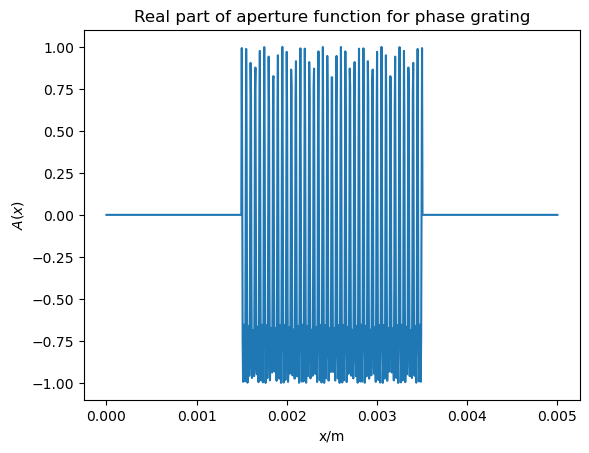

In [7]:
plt.plot(x_ap, np.real(aperture_sin(x_ap)))
plt.title('Real part of aperture function for phase grating')
plt.xlabel('x/m')
plt.ylabel(r'$A(x)$')
plt.show()

In [8]:
Psi = np.fft.fft(aperture_sin(x_ap))
f = np.fft.fftfreq(N, L/N)
Psi1 = np.fft.fftshift(Psi)
f1 = np.fft.fftshift(f)

I = np.square(np.abs(Psi1))
y1 = Lambda*D*f1

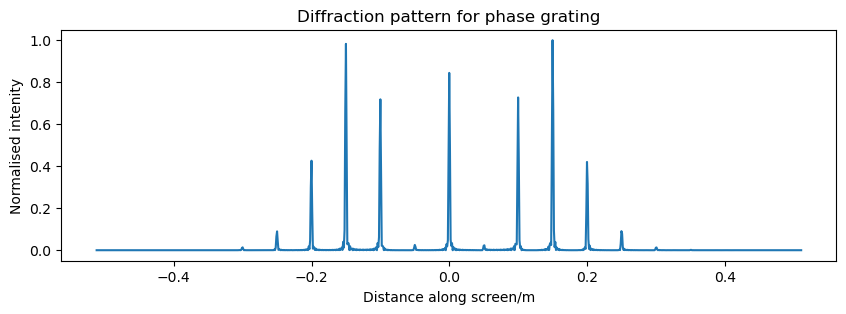

In [9]:
fig, ax = plt.subplots(figsize=(10,3))

ax.plot(y1, I/np.max(I))
ax.set_xlabel('Distance along screen/m')
ax.set_ylabel('Normalised intenity')
ax.set_title('Diffraction pattern for phase grating')
plt.show()

## Conclusion of core task 2
From FFT, the aperture function contains frequency components at $f_j=j/s$

# Core Task 3

In [71]:
L = 5e-3
N = 1024
m = 8
s = 100e-6

x_ap = np.linspace(-L/2,L/2, N)

In [103]:
D=0.5
d=2e-3

def better_aperture_sin(x):               # Phase grating, near-field
    return (np.cos(pi*(x**2)/(Lambda*D))+1j*np.sin(pi*(x**2)/(Lambda*D)))*aperture_sin(x+L/2)

Psi = np.fft.fft(better_aperture_sin(x_ap))
f = np.fft.fftfreq(N, L/N)
Psi = np.fft.fftshift(Psi)
f = np.fft.fftshift(f)

I_phase = np.square(np.abs(Psi)/np.max(np.abs(Psi)))
y_phase = Lambda*D*f

In [106]:
D = 5e-3
d = 1e-4

def better_aperture_slit(x):
    phase = pi*x**2/(Lambda*D) + pi
    return (np.cos(phase)+1j*np.sin(phase))*(np.heaviside(x+d/2, 0.5)-np.heaviside(x-d/2, 0.5))

Psi = np.fft.fft(better_aperture_slit(x_ap))
f = np.fft.fftfreq(N, L/N)
Psi = np.fft.fftshift(Psi)
f = np.fft.fftshift(f)

I_slit = np.square(np.abs(Psi)/np.max(np.abs(Psi)))
y_slit = Lambda*D*f

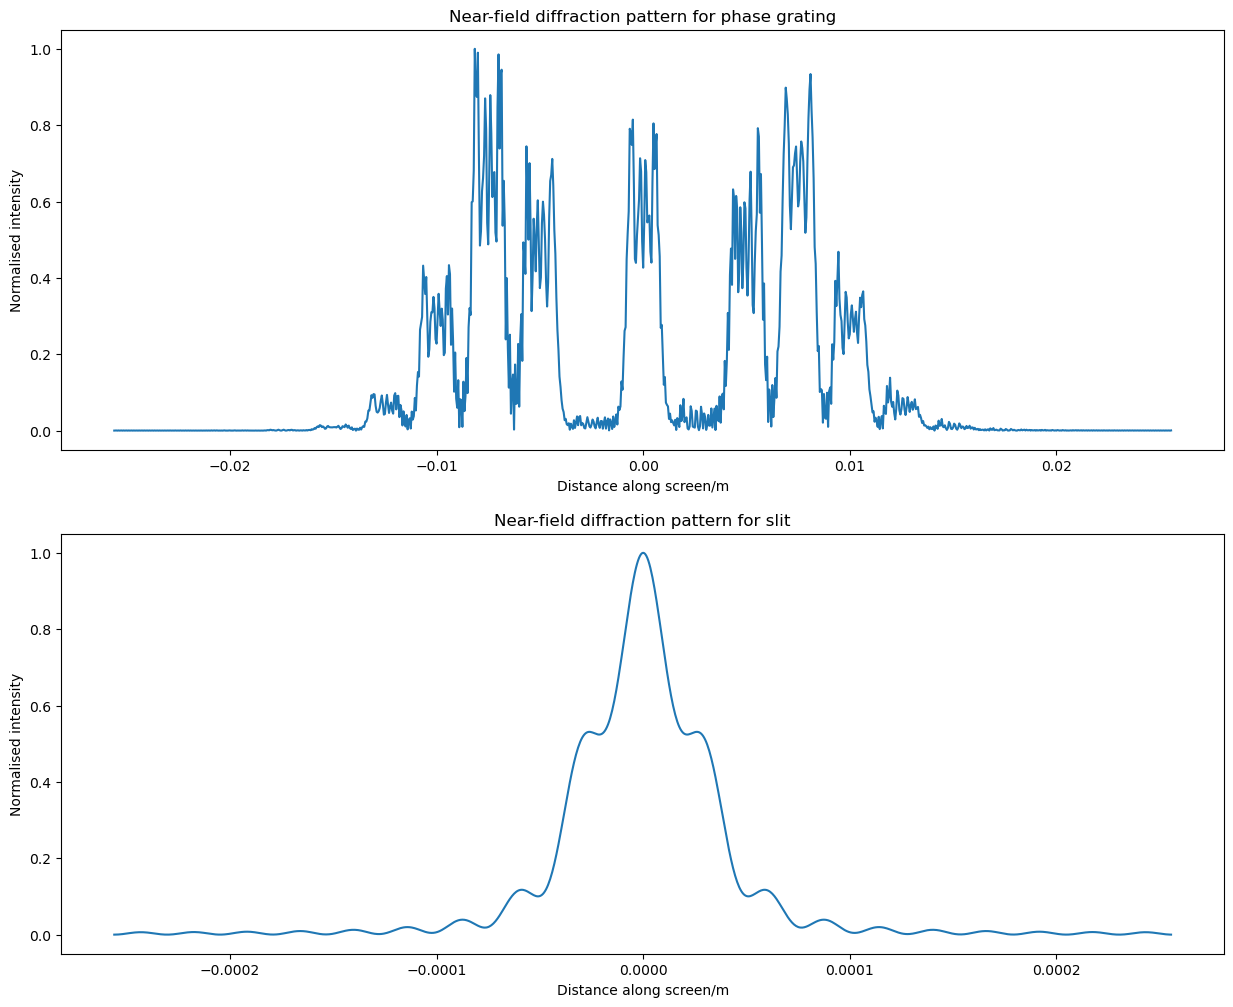

In [107]:
fig, axs = plt.subplots(2,1,figsize=(15,12))

axs[0].plot(y_phase,I_phase)
axs[0].set_title('Near-field diffraction pattern for phase grating')
axs[0].set_xlabel('Distance along screen/m')
axs[0].set_ylabel('Normalised intensity')
axs[1].plot(y_slit,I_slit)
axs[1].set_title('Near-field diffraction pattern for slit')
axs[1].set_xlabel('Distance along screen/m')
axs[1].set_ylabel('Normalised intensity')
plt.show()

## Conclusion for Core Task 3
Adding an x-dependent phase factor to $A(x)$ reproduces near-field diffraction patterns.

# Supplementary Task 1

In [47]:
def C_integrand(x):
    return np.cos(pi*x**2/2)

def S_integrand(x):
    return np.sin(pi*x**2/2)

In [48]:
def Fresnel_C(x):
    return quad(C_integrand, 0, x)[0]

def Fresnel_S(x):
    return quad(S_integrand, 0, x)[0]

Fresnel_C_all = np.vectorize(Fresnel_C)
Fresnel_S_all = np.vectorize(Fresnel_S)

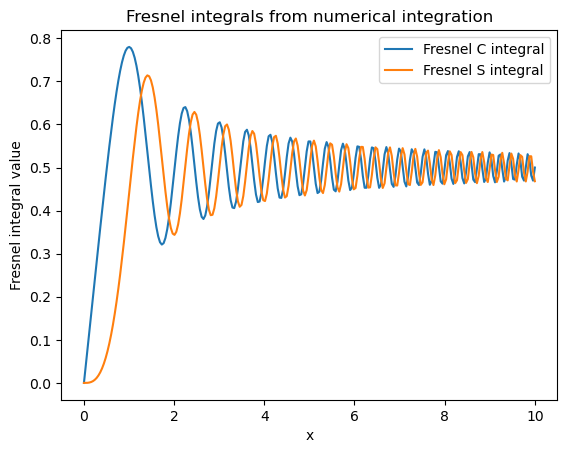

In [108]:
x = np.linspace(0, 10, 250)
plt.plot(x, Fresnel_C_all(x), label='Fresnel C integral')
plt.plot(x, Fresnel_S_all(x), label='Fresnel S integral')
plt.legend()
plt.xlabel('x')
plt.ylabel('Fresnel integral value')
plt.title('Fresnel integrals from numerical integration')
plt.show()

# Supplementary Task 2

The near-field, on-axis wave amplitude, for a slit at $x_0<x<x_1$
$$\Psi\propto \int_{x_0}^{x_1} \cos\left(\frac{\pi x^2}{\lambda D}\right)+i\sin\left(\frac{\pi x^2}{\lambda D}\right)\,dx$$

By rescaling coordinates:
$$w=\sqrt{\frac{2}{\lambda D}}x$$

This gives intensity:
$$I \propto \left| \int_{w_0}^{w_1}\cos(\frac{\pi w^2}{2})+i\sin(\frac{\pi w^2}{2})\,dw \right|^2 $$

For the intensity at $y\neq 0$, the integration limits are $x_0-y<x<x_1-y$

In [61]:
L=5e-3
D=5e-3
d=100e-6

x_ap = np.linspace(-L/2, L/2, 2*N)

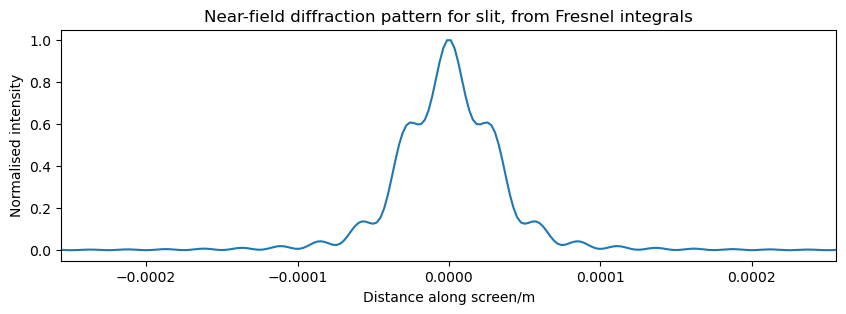

In [63]:
def intensity(x):
    w = np.sqrt(2/(Lambda*D))*x
    w0 = np.sqrt(2/(Lambda*D))*(0.5*d)
    amplitude = quad(C_integrand, -w0+w, w0+w, limit=100)[0] + 1j*quad(S_integrand, -w0+w, w0+w, limit=100)[0]
    return np.abs(amplitude)**2

intensity_all = np.vectorize(intensity)
pattern = intensity_all(x_ap)

fig, ax = plt.subplots(figsize=(10,3))
ax.plot(x_ap, pattern/np.max(pattern))
ax.set_xlim([-Lambda*D*(N)/(2*L), Lambda*D*(N)/(2*L)])
ax.set_xlabel('Distance along screen/m')
ax.set_ylabel('Normalised intensity')
ax.set_title('Near-field diffraction pattern for slit, from Fresnel integrals')
plt.show()

The result obtained from Fresnel integrals matches that of using FFT, with the phase factor correction.